# Dataframe Cleaning and Transformation

There are numerous approaches of how to deal with daily tasks of cleaning data.

For example (listing starts from most confusing way):

* pandas way
* slightly more advanced users might take advantage of the functional API
* via pyjanitor package (inspired by the ease-of-use and expressiveness of the dplyr package of the R statistical language ecosystem)

I always take the easy way out so we will focus on a consistent and expressive approach
utilizing `pyjanitor`.

So lets define it... `pyjanitor` is a Python implementation of the R package janitor, 
and provides a clean API for cleaning data.

Interestingly we import pyjanitor as janitor for a reason.

Afterwards we will inspect other methods two ways of doing things.

I prefer having one way of doing common tasks rather then having a myriad of them which reduces fluency and introduces clutter.

We are here to solve problems :)

## Tabular Dataset - NPD well data

In [51]:
import pandas as pd
import numpy as np
#pd.set_option('display.max_columns', None)  
import janitor

In [52]:
df = pd.read_csv("https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_all&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=82.102.27.246&CultureCode=en")

In [53]:
df.head()

wlbWellboreName wlbWell          wlbDrillingOperator wlbProductionLicence  \
0           1/2-1   1/2-1  Phillips Petroleum Norsk AS                 143    
1           1/2-2   1/2-2   Paladin Resources Norge AS               143 CS   
2           1/3-1   1/3-1             A/S Norske Shell                 011    
3           1/3-2   1/3-2             A/S Norske Shell                 011    
4           1/3-3   1/3-3       Elf Petroleum Norge AS                 065    

  wlbPurpose wlbStatus wlbContent  wlbWellType wlbSubSea wlbEntryDate  ...  \
0    WILDCAT       P&A        OIL  EXPLORATION        NO   20.03.1989  ...   
1    WILDCAT       P&A  OIL SHOWS  EXPLORATION        NO   14.12.2005  ...   
2    WILDCAT       P&A        GAS  EXPLORATION        NO   06.07.1968  ...   
3    WILDCAT       P&A        DRY  EXPLORATION        NO   14.05.1969  ...   
4    WILDCAT       P&A        OIL  EXPLORATION        NO   22.08.1982  ...   

  wlbNpdidWellbore dscNpdidDiscovery fldNpdidField fclNpdidFacilityDrilling  \
0             1382           43814.0     3437650.0                 296245.0   
1             5192               NaN           NaN                 278245.0   
2              154           43820.0           NaN                 288604.0   
3              165               NaN           NaN                 288847.0   
4               87           43826.0     1028599.0                 288334.0   

  wlbNpdidWellboreReclass  prlNpdidProductionLicence wlbNpdidSiteSurvey  \
0                       0                    21956.0                NaN   
1                       0                  2424919.0                NaN   
2                       0                    20844.0                NaN   
3                       0                    20844.0                NaN   
4                       0                    21316.0                NaN   

  wlbDateUpdated  wlbDateUpdatedMax  datesyncNPD  
0     03.10.2019         03.10.2019   19.11.2019  
1     03.10.2019         03.10.2019   19.11.2019  
2     03.10.2019         03.10.2019   19.11.2019  
3     03.10.2019         03.10.2019   19.11.2019  
4     03.10.2019         03.10.2019   19.11.2019  

[5 rows x 87 columns]

## Cleaning the dataframe

Lets list our columns names:

In [54]:
df.columns

Index(['wlbWellboreName', 'wlbWell', 'wlbDrillingOperator',
       'wlbProductionLicence', 'wlbPurpose', 'wlbStatus', 'wlbContent',
       'wlbWellType', 'wlbSubSea', 'wlbEntryDate', 'wlbCompletionDate',
       'wlbField', 'wlbDrillPermit', 'wlbDiscovery', 'wlbDiscoveryWellbore',
       'wlbBottomHoleTemperature', 'wlbSiteSurvey', 'wlbSeismicLocation',
       'wlbMaxInclation', 'wlbKellyBushElevation', 'wlbFinalVerticalDepth',
       'wlbTotalDepth', 'wlbWaterDepth', 'wlbKickOffPoint', 'wlbAgeAtTd',
       'wlbFormationAtTd', 'wlbMainArea', 'wlbDrillingFacility',
       'wlbFacilityTypeDrilling', 'wlbDrillingFacilityFixedOrMoveable',
       'wlbLicensingActivity', 'wlbMultilateral', 'wlbPurposePlanned',
       'wlbEntryYear', 'wlbCompletionYear', 'wlbReclassFromWellbore',
       'wlbReentryExplorationActivity', 'wlbPlotSymbol', 'wlbFormationWithHc1',
       'wlbAgeWithHc1', 'wlbFormationWithHc2', 'wlbAgeWithHc2',
       'wlbFormationWithHc3', 'wlbAgeWithHc3', 'wlbDrillingDays', 'wlbRee

### str_replace - replace something with something

We need to clean our column names so we make are subsequent workflows on dataframes
as easy as it can get.

**It is important that we wrap our chains of methods into parantheses** (why?) 
The second approach would be to end each line with a backslash. I find the first
approach more elegant so I will use it.

Remove wlb, fld, fcl prefixes.

In [55]:
df.columns = (
    df.columns
        .str.replace("wlb", "")
        .str.replace("fld", "")
        .str.replace("fcl", "")
)

In [56]:
df.columns

Index(['WellboreName', 'Well', 'DrillingOperator', 'ProductionLicence',
       'Purpose', 'Status', 'Content', 'WellType', 'SubSea', 'EntryDate',
       'CompletionDate', 'Field', 'DrillPermit', 'Discovery',
       'DiscoveryWellbore', 'BottomHoleTemperature', 'SiteSurvey',
       'SeismicLocation', 'MaxInclation', 'KellyBushElevation',
       'FinalVerticalDepth', 'TotalDepth', 'WaterDepth', 'KickOffPoint',
       'AgeAtTd', 'FormationAtTd', 'MainArea', 'DrillingFacility',
       'FacilityTypeDrilling', 'DrillingFacilityFixedOrMoveable',
       'LicensingActivity', 'Multilateral', 'PurposePlanned', 'EntryYear',
       'CompletionYear', 'ReclassFromWellbore', 'ReentryExplorationActivity',
       'PlotSymbol', 'FormationWithHc1', 'AgeWithHc1', 'FormationWithHc2',
       'AgeWithHc2', 'FormationWithHc3', 'AgeWithHc3', 'DrillingDays',
       'Reentry', 'LicenceTargetName', 'PluggedAbandonDate', 'PluggedDate',
       'GeodeticDatum', 'NsDeg', 'NsMin', 'NsSec', 'NsCode', 'EwDeg', 'EwMin',
 

### clean_names (janitor module) - unification of column names

Space out words by placing a snake between the words so it is nicer to look at the column names

In [57]:
df = (
    df.clean_names(case_type="snake")
)

In [58]:
df.columns

Index(['wellbore_name', 'well', 'drilling_operator', 'production_licence',
       'purpose', 'status', 'content', 'well_type', 'sub_sea', 'entry_date',
       'completion_date', 'field', 'drill_permit', 'discovery',
       'discovery_wellbore', 'bottom_hole_temperature', 'site_survey',
       'seismic_location', 'max_inclation', 'kelly_bush_elevation',
       'final_vertical_depth', 'total_depth', 'water_depth', 'kick_off_point',
       'age_at_td', 'formation_at_td', 'main_area', 'drilling_facility',
       'facility_type_drilling', 'drilling_facility_fixed_or_moveable',
       'licensing_activity', 'multilateral', 'purpose_planned', 'entry_year',
       'completion_year', 'reclass_from_wellbore',
       'reentry_exploration_activity', 'plot_symbol', 'formation_with_hc1',
       'age_with_hc1', 'formation_with_hc2', 'age_with_hc2',
       'formation_with_hc3', 'age_with_hc3', 'drilling_days', 'reentry',
       'licence_target_name', 'plugged_abandon_date', 'plugged_date',
       'geod

### Select columns with regex  

Select columns that start with *well* by applying regex pattern.

In [59]:
df_selected = (df.filter(regex="^well"))

In [60]:
df_selected.head()

wellbore_name   well    well_type
0         1/2-1  1/2-1  EXPLORATION
1         1/2-2  1/2-2  EXPLORATION
2         1/3-1  1/3-1  EXPLORATION
3         1/3-2  1/3-2  EXPLORATION
4         1/3-3  1/3-3  EXPLORATION

### Select columns and query a dataframe 

You select columns in dataframe by using .filter function --- a bit non-inuitive since we use
it to selec columns by a columns name, and we filter the columns by a condition by using .query function.

Filter dataframe by the elements from the list that is a part of the query argument - a list of values. 

**REMEMBER SINGLE QUOTES WITHIN DOUBLE QUOTES.**

In [61]:
(df
  .filter(items=["wellbore_name", "well_type"])
  .query("wellbore_name in ['1/2-1', '7324/10-1']")
)

wellbore_name    well_type
0            1/2-1  EXPLORATION
1916     7324/10-1  EXPLORATION

### Query dataframe by multiple conditions

In [62]:
(df
   .filter(items=["drilling_operator", "purpose", "total_depth"]) 
   .query('drilling_operator in ["A/S Norske Shell", "Statoil Petroleum AS"] & \
           purpose in "WILDCAT" & \
           1000 < total_depth < 2000'))

drilling_operator  purpose  total_depth
298       A/S Norske Shell  WILDCAT       1971.0
788   Statoil Petroleum AS  WILDCAT       1890.0
1289  Statoil Petroleum AS  WILDCAT       1640.0
1537      A/S Norske Shell  WILDCAT       1920.0
1830  Statoil Petroleum AS  WILDCAT       1033.0
1849  Statoil Petroleum AS  WILDCAT       1594.0
1852  Statoil Petroleum AS  WILDCAT       1780.0
1859  Statoil Petroleum AS  WILDCAT       1855.0
1897  Statoil Petroleum AS  WILDCAT       1500.0
1900  Statoil Petroleum AS  WILDCAT       1540.0
1906  Statoil Petroleum AS  WILDCAT       1090.0
1915  Statoil Petroleum AS  WILDCAT       1100.0
1918  Statoil Petroleum AS  WILDCAT       1210.0
1920  Statoil Petroleum AS  WILDCAT       1540.0

Query dataframe by a predefine list

In [174]:
operators_top_10 = ['Norsk Hydro Produksjon AS',
 'Statoil Petroleum AS',
 'Saga Petroleum ASA',
 'Lundin Norway AS',
 'Esso Exploration and Production Norway A/S',
 'A/S Norske Shell',
 'Elf Petroleum Norge AS',
 'Phillips Petroleum Company Norway',
 'Statoil ASA (old)']

You can refer to variables in the environment by prefixing them with an ‘@’ character like for example 
**@operators_top_10**, i.e.

.query("drilling_operator == **@operators_top_10**")

In [188]:
(df
    .query("drilling_operator == @operators_top_10")
    .filter(items=['drilling_operator', "drilling_days"])
    .head()
)

drilling_operator  drilling_days
2        A/S Norske Shell            129
3        A/S Norske Shell             75
4  Elf Petroleum Norge AS            216
5  Elf Petroleum Norge AS             83
6        A/S Norske Shell            134

### Sort dataframe by values in a column or columns

Sort by one column:

In [192]:
(df.filter(items=['drilling_operator', "drilling_days", "total_depth"])
    .sort_values(by="total_depth", ascending=False)
)

drilling_operator  drilling_days  total_depth
1257                 Statoil ASA (old)             49       7928.0
1276              Statoil Petroleum AS             32       7811.0
1260                 Statoil ASA (old)             27       7725.0
1258                 Statoil ASA (old)             67       7594.0
293   Den norske stats oljeselskap a.s            203       7584.0
...                                ...            ...          ...
1363                 Equinor Energy AS              0          0.0
436                   Lundin Norway AS              0          0.0
213        Repsol Exploration Norge AS              0          0.0
1002         Norsk Hydro Produksjon AS              0          0.0
1462                  A/S Norske Shell              0          0.0

[1921 rows x 3 columns]

Sort by multiple columns:

In [196]:
(df.filter(items=['drilling_operator', "drilling_days", "total_depth"])
    .sort_values(by=["drilling_operator", "drilling_days"], ascending=False)
)

drilling_operator  drilling_days  total_depth
1478  Wintershall Norge ASA            112       4177.0
1447  Wintershall Norge ASA             87       4216.0
1368  Wintershall Norge ASA             66       3585.0
1366  Wintershall Norge ASA             55       2807.0
1317  Wintershall Norge ASA             47       3006.0
...                     ...            ...          ...
1538       A/S Norske Shell             13       1800.0
1534       A/S Norske Shell             12       1804.0
1546       A/S Norske Shell             10       1805.0
961        A/S Norske Shell              9       5035.0
1462       A/S Norske Shell              0          0.0

[1921 rows x 3 columns]

In [ ]:
.sort_values("entry_year", ascending = False)

### Rename column names

Before:

In [63]:
(df
   .filter(items=["drilling_operator", "purpose", "total_depth"])
).head()

drilling_operator  purpose  total_depth
0  Phillips Petroleum Norsk AS  WILDCAT       3574.0
1   Paladin Resources Norge AS  WILDCAT       3434.0
2             A/S Norske Shell  WILDCAT       4877.0
3             A/S Norske Shell  WILDCAT       4297.0
4       Elf Petroleum Norge AS  WILDCAT       4876.0

After:

In [64]:
(df
   .filter(items=["drilling_operator", "purpose", "total_depth"])
   .rename(columns={"purpose":"well_purpose"}) ##  "old_name":"new_name"
)

drilling_operator well_purpose  total_depth
0          Phillips Petroleum Norsk AS      WILDCAT       3574.0
1           Paladin Resources Norge AS      WILDCAT       3434.0
2                     A/S Norske Shell      WILDCAT       4877.0
3                     A/S Norske Shell      WILDCAT       4297.0
4               Elf Petroleum Norge AS      WILDCAT       4876.0
...                                ...          ...          ...
1916  Den norske stats oljeselskap a.s      WILDCAT       2919.0
1917              Statoil Petroleum AS      WILDCAT       2865.0
1918              Statoil Petroleum AS      WILDCAT       1210.0
1919                 Equinor Energy AS      WILDCAT       4300.0
1920              Statoil Petroleum AS      WILDCAT       1540.0

[1921 rows x 3 columns]

Rename multiple columns by predefining a dictionary. 

In [65]:
# d
new_column_names = {
    "drilling_operator" : "DRILLING_COMPANY", 
    "purpose" : "WELL_PURPOSE",
    "total_depth" : "TOTAL_DEPTH_METERS"
}

(df
   .filter(items=["drilling_operator", "purpose", "total_depth"])
   .rename(columns=new_column_names) ##  "old_name":"new_name"
)

DRILLING_COMPANY WELL_PURPOSE  TOTAL_DEPTH_METERS
0          Phillips Petroleum Norsk AS      WILDCAT              3574.0
1           Paladin Resources Norge AS      WILDCAT              3434.0
2                     A/S Norske Shell      WILDCAT              4877.0
3                     A/S Norske Shell      WILDCAT              4297.0
4               Elf Petroleum Norge AS      WILDCAT              4876.0
...                                ...          ...                 ...
1916  Den norske stats oljeselskap a.s      WILDCAT              2919.0
1917              Statoil Petroleum AS      WILDCAT              2865.0
1918              Statoil Petroleum AS      WILDCAT              1210.0
1919                 Equinor Energy AS      WILDCAT              4300.0
1920              Statoil Petroleum AS      WILDCAT              1540.0

[1921 rows x 3 columns]

### Calculate summary statistic (min, max, mean, count,...) per group

What is the minimum and maximum total_depth grouped by completion_year and sorted by entry_year?

We see that well_bore name was silently dropped since it is a categorical column.

In [67]:
(df
  .filter(items=["wellbore_name", "entry_year", "total_depth"])
  .groupby("entry_year")
  .agg(
    total_depth_min = pd.NamedAgg(column="total_depth", aggfunc="min"),
    total_depth_max = pd.NamedAgg(column="total_depth", aggfunc="max")
    )
  .sort_values("entry_year", ascending = False)
  .reset_index()
  ).head(10)

entry_year  total_depth_min  total_depth_max
0        2019              0.0           6068.0
1        2018            381.0           6100.0
2        2017            508.0           7811.0
3        2016            488.0           7126.0
4        2015            840.0           5765.0
5        2014           1033.0           4889.0
6        2013            930.0           5634.0
7        2012           1640.0           5573.0
8        2011           1339.0           5672.0
9        2010           1178.0           5738.0

### What is a named function?

In [68]:
def add_ten(x):
    return x + 10

In [69]:
add_ten(10)

20

### What is lambda or anonymus function?

In Python, lambda expressions (or lambda forms) are utilized to construct anonymous functions. To do so, you will use the lambda keyword (just as you use def to define normal functions).

Every anonymous function you define in Python will have 3 essential parts:

The lambda keyword.
The parameters (or bound variables), and
The function body.
A lambda function can have any number of parameters, but the function body can only contain one expression.

Moreover, a lambda is written in a single line of code and can also be invoked immediately. You will see all this in action in the upcoming examples.

The formal syntax to write a lambda function is as given below:

lambda p1, p2: expression 

In [70]:
add_ten = lambda x: x + 1

In [71]:
add_ten(10)

11

### Add a new calculated column

`assign` method returns a new object with all original columns in addition to new ones. Existing columns that are re-assigned will be overwritten. For adding new columns to a DataFrame in a chain (inspired by dplyr's mutate)

`depth_flag` will be the new column that will have two values, if `total_depth` is larger or equal to 2000m, 
it will be classified as "deep", otherwise it will be classified as "shallow".


In [199]:
(df
    .filter(items=["wellbore_name", "total_depth", "utm_zone"])
    .assign(
        depth_flag=lambda x: np.where(x["total_depth"] >= 1000, "deep", "shallow")
        )  
)

wellbore_name  total_depth  utm_zone depth_flag
0            1/2-1       3574.0        31       deep
1            1/2-2       3434.0        31       deep
2            1/3-1       4877.0        31       deep
3            1/3-2       4297.0        31       deep
4            1/3-3       4876.0        31       deep
...            ...          ...       ...        ...
1916     7324/10-1       2919.0        35       deep
1917      7325/1-1       2865.0        35       deep
1918      7325/4-1       1210.0        35       deep
1919      7335/3-1       4300.0        37       deep
1920     7435/12-1       1540.0        37       deep

[1921 rows x 4 columns]

### Add calculated columns that are dependent on each other

In Python 3.6+, you can create multiple columns within the same assign where one of the columns depends on another one defined within the same assign.

We will calculate two new columns:

* `drilling_depth_flag` column which is when `total_depth` column has values larger or equal to 1000m, where they will be classified as "deep", and otherwise as "shallow"
* `depth_age_flag` column is dependent on the previously calculated column `drilling_depth_flag`. Output of the column is "deep_and_old" if "drilling_depth_flag" column is "deep") AND if "completion_year" column is less and equal than 2010, otherwise it is "shallow_and_new".

In [137]:
(df
    .filter(items=["wellbore_name", "total_depth", "utm_zone", "completion_year"])
    .assign(
        drilling_depth_flag=lambda x: np.where(x["total_depth"] >= 1000, "deep", "shallow"),
        depth_age_flag=lambda x: np.where(
            (x["drilling_depth_flag"] == "deep") & (x["completion_year"] <= 2010),   # drilling_depth_flag has been created in previous step 
            "deep_and_old", "deep_and_new")
        )  
)

wellbore_name  total_depth  utm_zone  completion_year  \
0            1/2-1       3574.0        31             1989   
1            1/2-2       3434.0        31             2006   
2            1/3-1       4877.0        31             1968   
3            1/3-2       4297.0        31             1969   
4            1/3-3       4876.0        31             1983   
...            ...          ...       ...              ...   
1916     7324/10-1       2919.0        35             1989   
1917      7325/1-1       2865.0        35             2014   
1918      7325/4-1       1210.0        35             2017   
1919      7335/3-1       4300.0        37             2019   
1920     7435/12-1       1540.0        37             2017   

     drilling_depth_flag depth_age_flag  
0                   deep   deep_and_old  
1                   deep   deep_and_old  
2                   deep   deep_and_old  
3                   deep   deep_and_old  
4                   deep   deep_and_old  
...                  ...            ...  
1916                deep   deep_and_old  
1917                deep   deep_and_new  
1918             shallow   deep_and_new  
1919                deep   deep_and_new  
1920             shallow   deep_and_new  

[1921 rows x 6 columns]

### Calculated column - define multiple cases with np.select

If you would like to caculate a column where, for example, each of the conditions will be re-mapped into a category, you can
handle it with `np.select()`

I would like to calculate a column `water_depth_category` has 4 categories, between 0 and 305 m, between 306 and 1524 m, between 1525 and 2133 m and more than 2134m.
Each of these categories is classified into Shallow Water, Midwater, Deepwater and Ultra-Deepwater - respectively. Otherwise it is Unknown.



In [220]:
df_multiple = (df
    .filter(items=["wellbore_name", "total_depth", "water_depth"])
    .assign(
        water_depth_category = lambda x: np.select(
            condlist = [
                x["water_depth"].between(0, 305, inclusive=True),
                x["water_depth"].between(306, 1524, inclusive=True),
                x["water_depth"].between(1525, 2133, inclusive=True),
                x["water_depth"].between(2134, np.max(x["water_depth"]), inclusive=True)
                ],
            choicelist = [ 
                "Shallow Water",
                "Midwater",
                "Deepwater",
                "Ultra-Deepwater"
            ],
            default="Unknown" 
        )
    )
)
df_multiple["water_depth_category"].value_counts()    
#df_multiple.query("water_depth_category == 'Ultra Deep'")

Shallow Water    1373
Midwater          546
Deepwater           2
Name: water_depth_category, dtype: int64

In [223]:
df_multiple.sample(10)

wellbore_name  total_depth  water_depth water_depth_category
1388   6204/10-2 R       2095.0        172.0        Shallow Water
320         15/3-3       5115.0        109.0        Shallow Water
541        16/7-11       2650.0         80.5        Shallow Water
1425      6406/2-1       5292.0        278.0        Shallow Water
1878    7223/5-1 A          0.0        332.0             Midwater
774       25/11-16       1945.0        120.0        Shallow Water
518       16/4-8 S       2700.0        100.0        Shallow Water
673      25/4-10 S       2912.0        123.0        Shallow Water
1345    35/11-10 A       3259.0        353.5             Midwater
1269    34/10-52 A       3520.0        134.0        Shallow Water

### Converting columns to date and time, and calculating difference

### 

In [308]:
df.columns

df_days = (df
    .filter(items = ['well', 'entry_date','completion_date'])
    .assign(
        entry_date=pd.to_datetime(df['entry_date']),
        completion_date=pd.to_datetime(df['completion_date']),
        days_of_drilling = lambda x: x["completion_date"] - x["entry_date"],
        days_of_drilling_int = df_days["days_of_drilling"].dt.days
        )
    )
df_days.head()

well entry_date completion_date days_of_drilling  days_of_drilling_int
0  1/2-1 1989-03-20      1989-04-06          17 days                  17.0
1  1/2-2 2005-12-14      2006-02-02          50 days                  50.0
2  1/3-1 1968-06-07      1968-11-11         157 days                 157.0
3  1/3-2 1969-05-14      1969-07-27          74 days                  74.0
4  1/3-3 1982-08-22      1983-03-24         214 days                 214.0

In [263]:
df

wellbore_name       well                 drilling_operator  \
0            1/2-1      1/2-1       Phillips Petroleum Norsk AS   
1            1/2-2      1/2-2        Paladin Resources Norge AS   
2            1/3-1      1/3-1                  A/S Norske Shell   
3            1/3-2      1/3-2                  A/S Norske Shell   
4            1/3-3      1/3-3            Elf Petroleum Norge AS   
...            ...        ...                               ...   
1916     7324/10-1  7324/10-1  Den norske stats oljeselskap a.s   
1917      7325/1-1   7325/1-1              Statoil Petroleum AS   
1918      7325/4-1   7325/4-1              Statoil Petroleum AS   
1919      7335/3-1   7335/3-1                 Equinor Energy AS   
1920     7435/12-1  7435/12-1              Statoil Petroleum AS   

     production_licence  purpose status    content    well_type sub_sea  \
0                  143   WILDCAT    P&A        OIL  EXPLORATION      NO   
1                143 CS  WILDCAT    P&A  OIL SHOWS  EXPLORATION      NO   
2                  011   WILDCAT    P&A        GAS  EXPLORATION      NO   
3                  011   WILDCAT    P&A        DRY  EXPLORATION      NO   
4                  065   WILDCAT    P&A        OIL  EXPLORATION      NO   
...                 ...      ...    ...        ...          ...     ...   
1916               162   WILDCAT    P&A      SHOWS  EXPLORATION      NO   
1917               615   WILDCAT    P&A        GAS  EXPLORATION      NO   
1918               855   WILDCAT    P&A    OIL/GAS  EXPLORATION      NO   
1919               859   WILDCAT    P&A        DRY  EXPLORATION      NO   
1920               859   WILDCAT    P&A        GAS  EXPLORATION      NO   

      entry_date  ... npdid_wellbore dsc_npdid_discovery npdid_field  \
0     20.03.1989  ...           1382             43814.0   3437650.0   
1     14.12.2005  ...           5192                 NaN         NaN   
2     06.07.1968  ...            154             43820.0         NaN   
3     14.05.1969  ...            165                 NaN         NaN   
4     22.08.1982  ...             87             43826.0   1028599.0   
...          ...  ...            ...                 ...         ...   
1916  03.06.1989  ...           1411                 NaN         NaN   
1917  23.06.2014  ...           7501          24689817.0         NaN   
1918  19.07.2017  ...           8211          29469097.0         NaN   
1919  13.05.2019  ...           8735                 NaN         NaN   
1920  09.08.2017  ...           8228          29491696.0         NaN   

     npdid_facility_drilling npdid_wellbore_reclass  \
0                   296245.0                      0   
1                   278245.0                      0   
2                   288604.0                      0   
3                   288847.0                      0   
4                   288334.0                      0   
...                      ...                    ...   
1916                294382.0                      0   
1917                404201.0                      0   
1918                439972.0                      0   
1919                415836.0                      0   
1920                439972.0                      0   

      prl_npdid_production_licence npdid_site_survey date_updated  \
0                          21956.0               NaN   03.10.2019   
1                        2424919.0               NaN   03.10.2019   
2                          20844.0               NaN   03.10.2019   
3                          20844.0               NaN   03.10.2019   
4                          21316.0               NaN   03.10.2019   
...                            ...               ...          ...   
1916                       22108.0               NaN   03.10.2019   
1917                    20429544.0               NaN   03.10.2019   
1918                    28168828.0               NaN   13.11.2019   
1919                    28169055.0               NaN   17.10.2019   
1920          

### pivot_table from long to wide dataframe format

Let’s use the pivot method to reshape this data so that the `purpose` of the wells become the columns and the `water_depth` becomes the values.

Guidance — Consider using only pivot_table and not pivot.

pivot_table can accomplish all of what pivot can do. In the case that you do not need to perform an aggregation, you still must provide an aggregation function.

In [328]:
df_pivoted = (df
    .filter(items=["wellbore_name", "purpose", "water_depth"])
    .pivot_table(
        index="wellbore_name",
        columns="purpose",
        values="water_depth",
        aggfunc="mean"
    )
    .reset_index()
    #.filter(items=["wellbore_name", "APPRAISAL", "WILDCAT", "WILDCAT-CCS"])
    )
df_pivoted

purpose wellbore_name  APPRAISAL  WILDCAT  WILDCAT-CCS
0               1/2-1        NaN     72.0          NaN
1               1/2-2        NaN     74.0          NaN
2               1/3-1        NaN     71.0          NaN
3              1/3-10       72.0      NaN          NaN
4            1/3-10 A       72.0      NaN          NaN
...               ...        ...      ...          ...
1916            9/4-2        NaN     70.0          NaN
1917            9/4-3        NaN     72.0          NaN
1918            9/4-4        NaN     78.0          NaN
1919            9/4-5        NaN     77.0          NaN
1920            9/8-1        NaN     68.0          NaN

[1921 rows x 4 columns]

### Melt from wide to long dataframe format

In [332]:
(df_pivoted
    .melt(
    id_vars='wellbore_name', 
    value_vars=['APPRAISAL', 'WILDCAT', 'WILDCAT-CCS'],
    value_name='water_depth_m'
    )
    .dropna(subset=["water_depth_m"])
    )

wellbore_name      purpose  water_depth_m
3           1/3-10    APPRAISAL           72.0
4         1/3-10 A    APPRAISAL           72.0
12           1/3-7    APPRAISAL           72.0
14         1/3-9 S    APPRAISAL           68.0
22           1/6-3    APPRAISAL           69.0
...            ...          ...            ...
3838         9/4-3      WILDCAT           72.0
3839         9/4-4      WILDCAT           78.0
3840         9/4-5      WILDCAT           77.0
3841         9/8-1      WILDCAT           68.0
4760        31/5-7  WILDCAT-CCS          307.0

[1921 rows x 3 columns]

In [336]:
df.columns

Index(['wellbore_name', 'well', 'drilling_operator', 'production_licence',
       'purpose', 'status', 'content', 'well_type', 'sub_sea', 'entry_date',
       'completion_date', 'field', 'drill_permit', 'discovery',
       'discovery_wellbore', 'bottom_hole_temperature', 'site_survey',
       'seismic_location', 'max_inclation', 'kelly_bush_elevation',
       'final_vertical_depth', 'total_depth', 'water_depth', 'kick_off_point',
       'age_at_td', 'formation_at_td', 'main_area', 'drilling_facility',
       'facility_type_drilling', 'drilling_facility_fixed_or_moveable',
       'licensing_activity', 'multilateral', 'purpose_planned', 'entry_year',
       'completion_year', 'reclass_from_wellbore',
       'reentry_exploration_activity', 'plot_symbol', 'formation_with_hc1',
       'age_with_hc1', 'formation_with_hc2', 'age_with_hc2',
       'formation_with_hc3', 'age_with_hc3', 'drilling_days', 'reentry',
       'licence_target_name', 'plugged_abandon_date', 'plugged_date',
       'geod

In [333]:
df

wellbore_name       well                 drilling_operator  \
0            1/2-1      1/2-1       Phillips Petroleum Norsk AS   
1            1/2-2      1/2-2        Paladin Resources Norge AS   
2            1/3-1      1/3-1                  A/S Norske Shell   
3            1/3-2      1/3-2                  A/S Norske Shell   
4            1/3-3      1/3-3            Elf Petroleum Norge AS   
...            ...        ...                               ...   
1916     7324/10-1  7324/10-1  Den norske stats oljeselskap a.s   
1917      7325/1-1   7325/1-1              Statoil Petroleum AS   
1918      7325/4-1   7325/4-1              Statoil Petroleum AS   
1919      7335/3-1   7335/3-1                 Equinor Energy AS   
1920     7435/12-1  7435/12-1              Statoil Petroleum AS   

     production_licence  purpose status    content    well_type sub_sea  \
0                  143   WILDCAT    P&A        OIL  EXPLORATION      NO   
1                143 CS  WILDCAT    P&A  OIL SHOWS  EXPLORATION      NO   
2                  011   WILDCAT    P&A        GAS  EXPLORATION      NO   
3                  011   WILDCAT    P&A        DRY  EXPLORATION      NO   
4                  065   WILDCAT    P&A        OIL  EXPLORATION      NO   
...                 ...      ...    ...        ...          ...     ...   
1916               162   WILDCAT    P&A      SHOWS  EXPLORATION      NO   
1917               615   WILDCAT    P&A        GAS  EXPLORATION      NO   
1918               855   WILDCAT    P&A    OIL/GAS  EXPLORATION      NO   
1919               859   WILDCAT    P&A        DRY  EXPLORATION      NO   
1920               859   WILDCAT    P&A        GAS  EXPLORATION      NO   

      entry_date  ... npdid_wellbore dsc_npdid_discovery npdid_field  \
0     20.03.1989  ...           1382             43814.0   3437650.0   
1     14.12.2005  ...           5192                 NaN         NaN   
2     06.07.1968  ...            154             43820.0         NaN   
3     14.05.1969  ...            165                 NaN         NaN   
4     22.08.1982  ...             87             43826.0   1028599.0   
...          ...  ...            ...                 ...         ...   
1916  03.06.1989  ...           1411                 NaN         NaN   
1917  23.06.2014  ...           7501          24689817.0         NaN   
1918  19.07.2017  ...           8211          29469097.0         NaN   
1919  13.05.2019  ...           8735                 NaN         NaN   
1920  09.08.2017  ...           8228          29491696.0         NaN   

     npdid_facility_drilling npdid_wellbore_reclass  \
0                   296245.0                      0   
1                   278245.0                      0   
2                   288604.0                      0   
3                   288847.0                      0   
4                   288334.0                      0   
...                      ...                    ...   
1916                294382.0                      0   
1917                404201.0                      0   
1918                439972.0                      0   
1919                415836.0                      0   
1920                439972.0                      0   

      prl_npdid_production_licence npdid_site_survey date_updated  \
0                          21956.0               NaN   03.10.2019   
1                        2424919.0               NaN   03.10.2019   
2                          20844.0               NaN   03.10.2019   
3                          20844.0               NaN   03.10.2019   
4                          21316.0               NaN   03.10.2019   
...                            ...               ...          ...   
1916                       22108.0               NaN   03.10.2019   
1917                    20429544.0               NaN   03.10.2019   
1918                    28168828.0               NaN   13.11.2019   
1919                    28169055.0               NaN   17.10.2019   
1920          

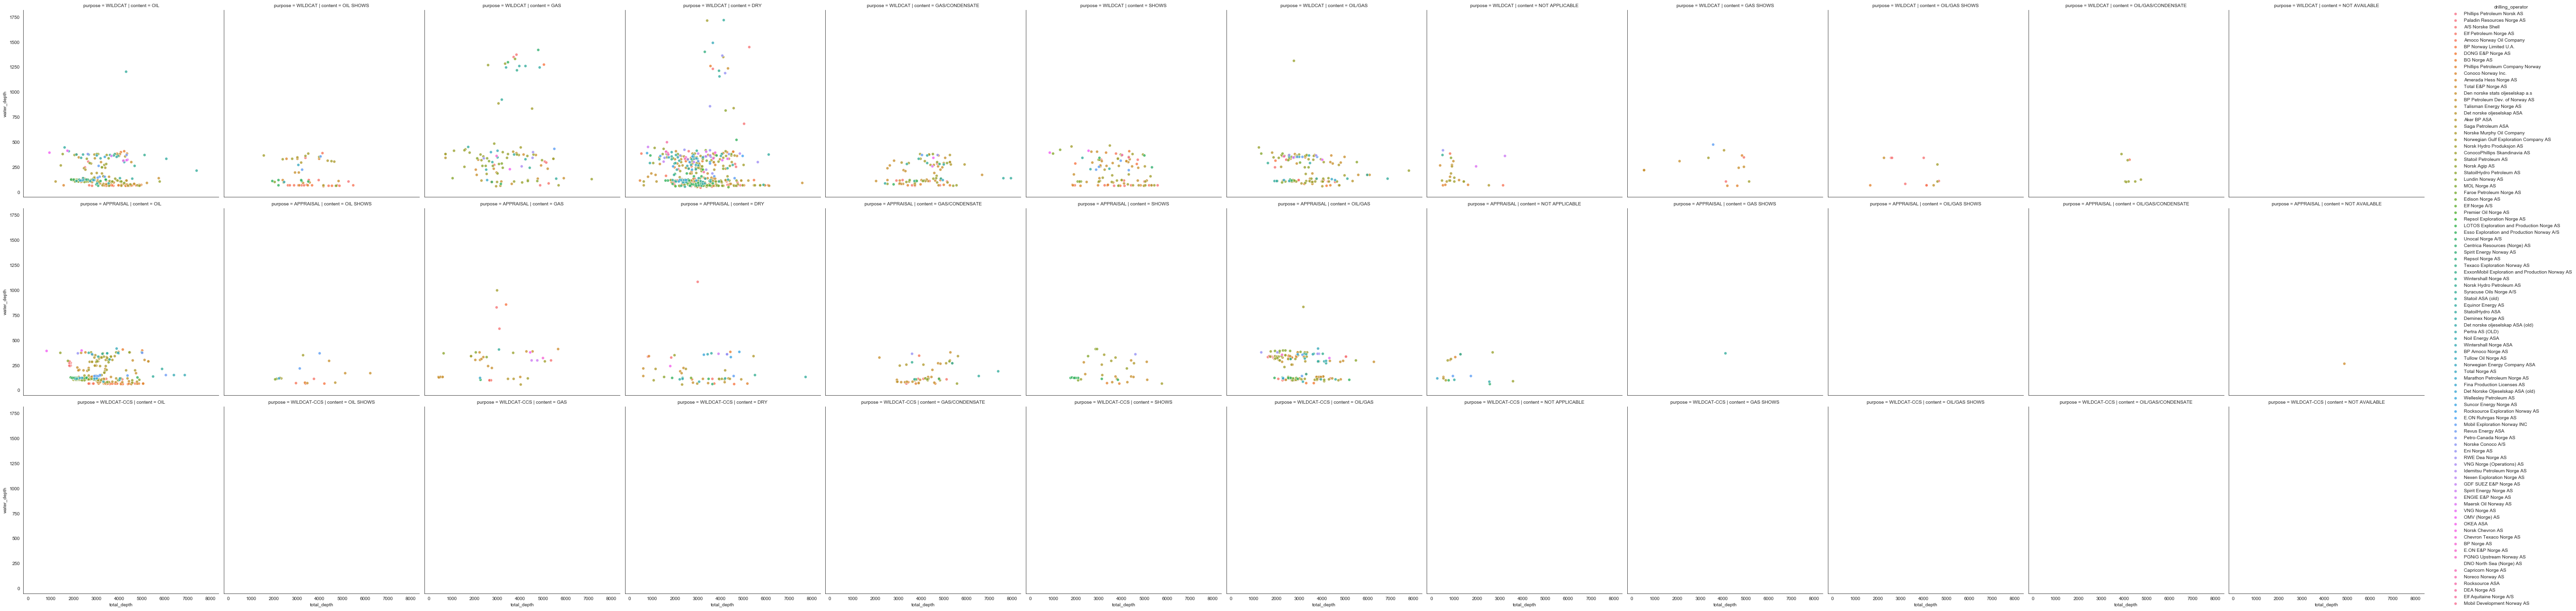

In [340]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_style('white')

(df
    .filter(items=["wellbore_name", "purpose", "content", "drilling_operator", "total_depth", "water_depth"])
    .pipe((sns.FacetGrid, 'data'),
       row='purpose', col='content', hue='drilling_operator',
      #hue_order=list('DEFGHIJ'),
       height=6,
       legend_out=True)
    .map(sns.scatterplot, 'total_depth', 'water_depth', alpha=0.8)
    .add_legend()
 )

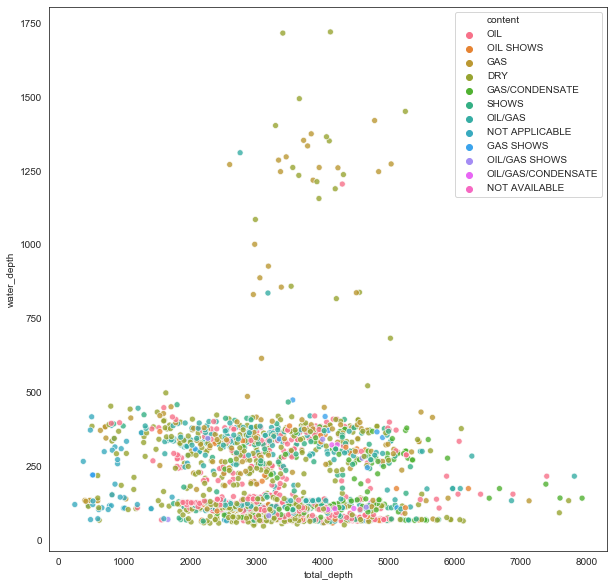

In [347]:
plt.figure(figsize=(10,10))

(df
    .filter(items=["wellbore_name", "purpose", "content", "drilling_operator", "total_depth", "water_depth"])
    .pipe((sns.scatterplot, 'data'),
            x='total_depth', 
            y='water_depth', 
            hue='content',
            alpha=0.8)
    #.add_legend()
 );

In [ ]:
g = sns.FacetGrid(data=df2, col='pricecat', hue='dim')
g.map(sns.kdeplot, 'mm', shade=True, alpha=0.5).add_legend()